In [1]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [2]:
#importing datasets  
data_set= pd.read_csv('exp6_Purchase_Data.csv')  

In [3]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    32,  80000],
       [    18,  25000],
       [    29,  26000],
       [    47,  28000],
       [    45,  29000],
       [    46,  22000],
       [    48,  49000],
       [    36, 200000],
       [    30,  90000]], dtype=int64)

In [4]:
y= data_set.iloc[:, 4].values 
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [5]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [6]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [7]:
x_train

array([[ 0.23687164, -1.16301371],
       [ 0.01246693,  1.01511601],
       [-1.33396136, -0.9512511 ],
       [-0.54854486, -0.70923669],
       [-0.32414014,  0.8336052 ],
       [-0.09973543, -0.9209993 ],
       [-1.221759  ,  0.59159079],
       [-0.4363425 , -0.40671867],
       [-0.32414014,  0.04705836],
       [ 1.919907  , -0.86049569],
       [ 0.57347871,  0.25882097],
       [ 0.23687164,  2.83022412],
       [ 1.69550229, -0.83024389],
       [-0.32414014,  0.01680656],
       [-1.221759  , -1.13276191],
       [ 2.03210936, -0.22520786],
       [ 0.23687164,  0.712598  ],
       [-1.10955664,  0.89410881]])

In [8]:
x_test

array([[-0.4363425 , -0.13445245],
       [-0.4363425 ,  0.712598  ],
       [ 0.68568107,  4.34281421],
       [-1.33396136,  0.7731016 ],
       [ 1.80770464, -1.04200651],
       [ 0.57347871, -1.10251011]])

In [9]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [10]:
classifier

KNeighborsClassifier(n_neighbors=3)

In [11]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 1, 0, 1, 1], dtype=int64)

In [12]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[3, 1],
       [0, 2]], dtype=int64)

C:\Users\WADEHRA\AppData\Local\Temp\ipykernel_13676\765120937.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


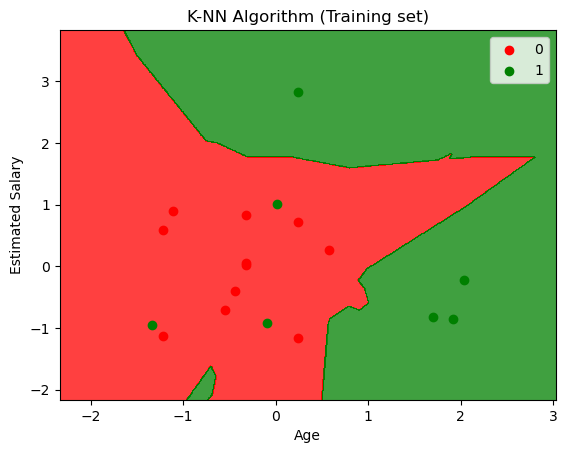

In [13]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

C:\Users\WADEHRA\AppData\Local\Temp\ipykernel_13676\1394410460.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


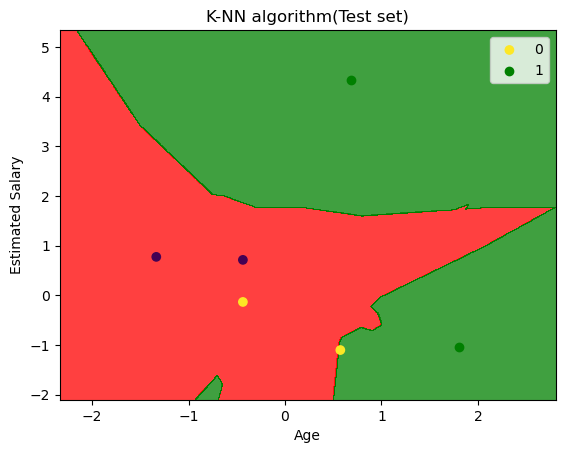

In [14]:
#Visualizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN algorithm(Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  